# Imports and setup

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
root_dir = Path(os.getcwd()).parent

In [3]:
os.chdir(root_dir)

In [4]:
from src._user_growth import (get_user_counts_by_date,
                              get_active_user_counts_by_date)

In [5]:
SEED = 100

# Users and DAU on default args

In [6]:
user_counts = get_user_counts_by_date('2019-01-01', '2020-01-01',
                                      seed=SEED)

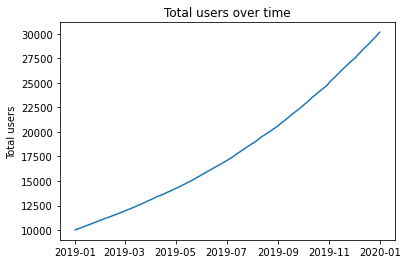

In [7]:
fig, ax = plt.subplots()
plt.plot(user_counts)
ax.set_ylabel('Total users')
ax.set_title('Total users over time')
plt.show()

In [8]:
dau_counts = get_active_user_counts_by_date('2019-01-01', '2020-01-01',
                                            seed=SEED)

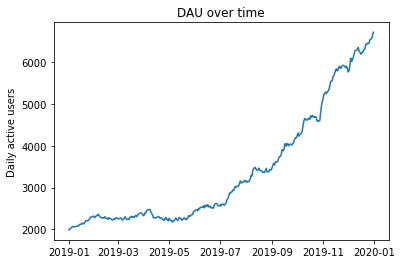

In [9]:
fig, ax = plt.subplots()
plt.plot(dau_counts)
ax.set_ylabel('Daily active users')
ax.set_title('DAU over time')
plt.show()

# Daily active user dynamics

**Total user count** is modelled as random walk (no drift) - this gives the hockey stick growth.

**DAU count** is modelled as having random walk with slight drift, so even businesses with high total user growth might have patches of stagnant user engagement.

## Different seeds on default args

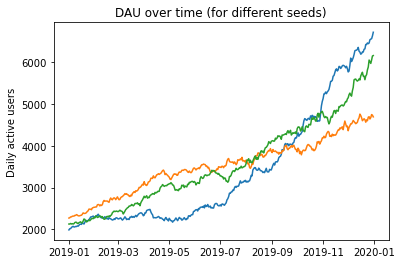

In [10]:
fig, ax = plt.subplots()
for s in [100, 1000, 10000]:
    plt.plot(get_active_user_counts_by_date('2019-01-01',
                                            '2020-01-01',
                                            seed=s))
ax.set_ylabel('Daily active users')
ax.set_title('DAU over time (for different seeds)')
plt.show()

On the default YoY growth rate, DAU will be trending up (but might have stagnant months).

## Low user YoY growth rate

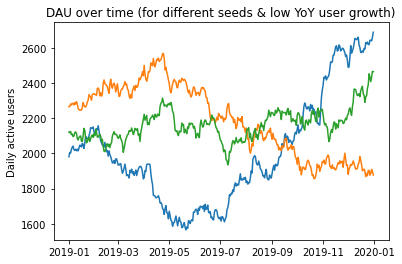

In [11]:
fig, ax = plt.subplots()
for s in [100, 1000, 10000]:
    plt.plot(get_active_user_counts_by_date('2019-01-01',
                                            '2020-01-01',
                                            approx_yoy_growth_rate=1.2,
                                            seed=s))
ax.set_ylabel('Daily active users')
ax.set_title('DAU over time (for different seeds & low YoY user growth)')
plt.show()

DAU might drift down (from DAU % drifting down at faster rate than user growth rate).